# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{MadaLine Network}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## $\color{deepskyblue}{\text{Functions}}$
We used the following functions to calculate accuracy and generate circular data based on the problem description. The latter function takes the boundary radius and center coordinates of the circle and generates uniformly distributed random data within two circles with radius equal to the given boundary radius.

In [38]:
def make_cir_data(radius1,radius2,x_center,y_center,N):
  theta = np.random.uniform(0,2*np.pi,N)
  radius = np.random.uniform(radius1,radius2,N)
  x = x_center + (radius * np.cos(theta))
  y = y_center + (radius * np.sin(theta))
  return x, y

## $\color{deepskyblue}{\text{Plot the Generated Points}}$

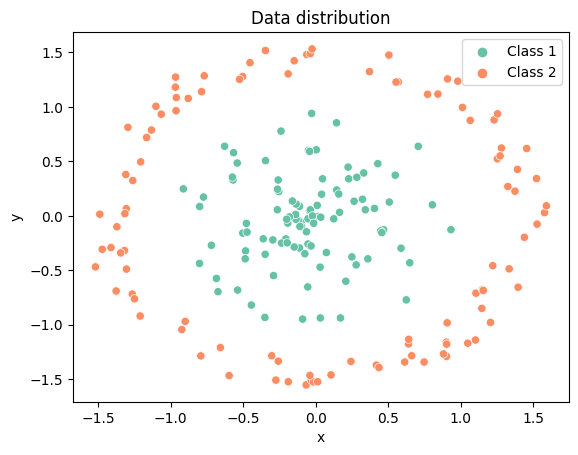

In [39]:
df = pd.DataFrame()
xtrain1, ytrain1 = make_cir_data(0,1,0,0,100)
xtrain2, ytrain2 = make_cir_data(1.3,1.6,0,0,100)
df['x'] = np.concatenate([xtrain1, xtrain2])
df['y'] = np.concatenate([ytrain1, ytrain2])
df['label'] = np.concatenate([-1*np.ones(100),  np.ones(100)])
xtrain = df.iloc[:,0]
ytrain = df.iloc[:,1]
label = df.iloc[:,2]
sns.scatterplot(data=df, x = df.columns[0], y = df.columns[1], hue=df.columns[2], palette='Set2')
handles, labels = plt.gca().get_legend_handles_labels()
plt.title('Data distribution')
new_labels = ['Class 1', 'Class 2']  
plt.legend(handles, new_labels)

plt.show()

## $\color{deepskyblue}{\text{Madaline Class}}$
This class is particularly useful for binary classification problems where the target values are either 0 or 1. The Madaline algorithm is a variation of the Adaline algorithm designed to handle the linear inseparability of classes. The model can then be used to make predictions on new input data. We decribe some of its methods:

$forwardprop$: This method performs forward propagation for a given input sample, calculating the activation of the hidden layer neurons and the output based on the weights, biases, and inputs.

$backprop$: This method performs the backpropagation algorithm, adjusting the weights and biases based on the predicted output and the true label of the sample. It updates the weights and biases to minimize the error between the predicted and true labels.

$fit$: This method trains the Madaline network by iteratively performing forward and backward propagation on the training data. It keeps track of the loss and the number of epochs until convergence or a maximum number of epochs is reached.

In [40]:
class MadaLine():
    def __init__(self, data, m,lr = 0.001):
        self.data = data
        self.m = m
        self.lr = lr
        self.n = len(data.index)
        self.W = np.random.random(size=(2, m))/1000.
        self.B = np.random.random(size=m+1)/100.
        self.B[-1]=m-1.0
        self.V = np.ones((m,))

    def forwardprop(self, sample, W, B, V):
        sample = np.array(sample)[:2]
        Z_in = B[:-1]+np.matmul(sample, W)
        Z = np.sign(Z_in+1e-9)
        y_in = B[-1] + sum(Z*V)
        y = np.sign(y_in+1e-9) 
        return Z_in, Z, y_in, y


    def backprop(self, sample, y, W, B, Z_in):
        label = np.array(sample)[2]
        X = np.array(sample)[:2]

        if label == y:
            pass
        elif label == 1:
            j = np.argmax(Z_in)
            B[j] += self.lr*(1-Z_in[j])
            aa = self.lr*(1-Z_in[j])*X
            W[:,j] += aa

        elif label == -1:
            for k in range(self.m):
                if Z_in[k]>0:
                    B[k] += self.lr*(-1-Z_in[k])
                    W[:,k] += self.lr*((-1-Z_in[k])*X)

        return W, B

    def fit(self):
        V = self.V
        B = self.B
        W = self.W
        n = self.n
    
        error = []
        max_epoch = 100
        self.epoch = 0
        loss = []
        while True:
            error = []
            for i in range(n):
                sample = self.data.iloc[i]
                Z_in, Z, y_in, y = self.forwardprop(sample, W, B, V)
                W, B = self.backprop(sample, y, W, B, Z_in)
                error.append(0.5*(sample['label']-y)**2)
            loss.append(sum(error))
            self.epoch += 1
            if loss[-1]==0 or self.epoch >= max_epoch:
                break

        return loss, self.epoch, W, B
    def get_accuracy(self):
        V = self.V
        B = self.B
        W = self.W
        n = self.n
        m = self.m
        acc = 0
        for i in range(n):
            sample = df.iloc[i]
            predict = self.forwardprop(sample, W, B, V)[-1]
            if predict == sample.label:
                acc +=1
        print(f'model with {m} MadaLines has {acc/n*100}% accuracy')
        print(f'model with {m} MadaLines finished {self.epoch} epochs')

    def plot_lines(self):

        B = self.B
        W = self.W
        m = self.m
        x=np.linspace(-2,2,100)
        sns.scatterplot(data=df, x = df.columns[0], y = df.columns[1], hue=df.columns[2], palette='Set2')
        plt.title(f'MadaLine Seperator Network with {m} Lines')
        handles, labels = plt.gca().get_legend_handles_labels()
        new_labels = ['Class 1', 'Class 2']  
        plt.legend(handles, new_labels)

        for i in range(m):
            plt.plot(x,-W[0][i]/W[1][i]*x-B[i]/W[1][i]);
        plt.ylim([-3,3])
        plt.show()

## $\color{deepskyblue}{\text{3 Neurons Madaline}}$

model with 3 MadaLines has 89.5% accuracy
model with 3 MadaLines finished 100 epochs


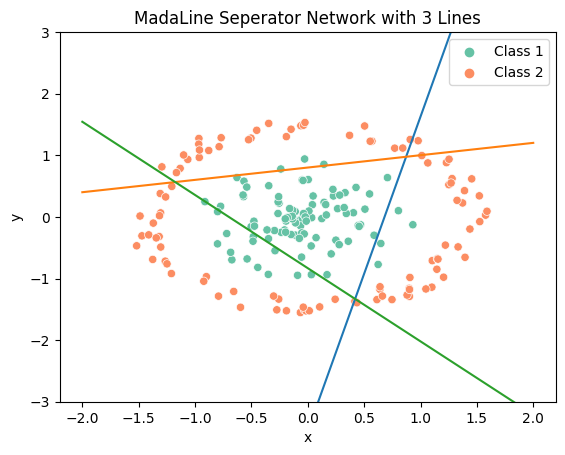

In [41]:
mad3 = MadaLine(data = df, m = 3)
loss3, _, _, _ = mad3.fit()
mad3.get_accuracy()
mad3.plot_lines()

## $\color{deepskyblue}{\text{6 Neurons Madaline}}$

model with 6 MadaLines has 100.0% accuracy
model with 6 MadaLines finished 35 epochs


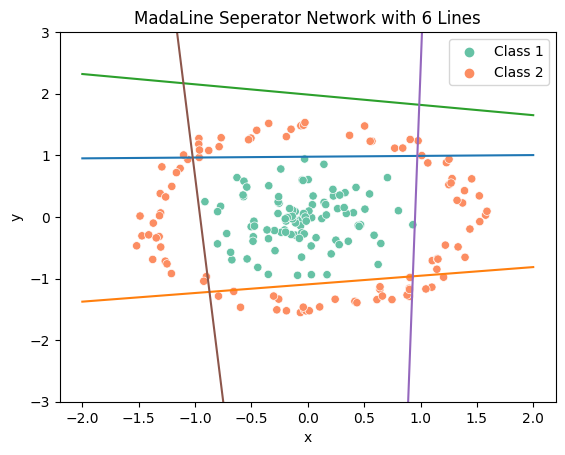

In [42]:
mad6 = MadaLine(data = df, m = 6)
loss6, _, _, _ = mad6.fit()
mad6.get_accuracy()
mad6.plot_lines()